In [3]:
import pandas as pd 
import numpy as np 


In [208]:
df=pd.read_csv("Crop_recommendation.csv")
df

,N,P,K,temperature,humidity,ph,rainfall,label
0,90,42,43,20.879744,82.002744,6.502985,202.935536,rice
1,85,58,41,21.770462,80.319644,7.038096,226.655537,rice
2,60,55,44,23.004459,82.320763,7.840207,263.964248,rice
3,74,35,40,26.491096,80.158363,6.980401,242.864034,rice
4,78,42,42,20.130175,81.604873,7.628473,262.717340,rice
...,...,...,...,...,...,...,...,...
2195,107,34,32,26.774637,66.413269,6.780064,177.774507,coffee
2196,99,15,27,27.417112,56.636362,6.086922,127.924610,coffee
2197,118,33,30,24.131797,67.225123,6.362608,173.322839,coffee
2198,117,32,34,26.272418,52.127394,6.758793,127.175293,coffee


In [210]:
df.shape

(2200, 8)

In [212]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2200 entries, 0 to 2199
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   N            2200 non-null   int64  
 1   P            2200 non-null   int64  
 2   K            2200 non-null   int64  
 3   temperature  2200 non-null   float64
 4   humidity     2200 non-null   float64
 5   ph           2200 non-null   float64
 6   rainfall     2200 non-null   float64
 7   label        2200 non-null   object 
dtypes: float64(4), int64(3), object(1)
memory usage: 137.6+ KB


In [214]:
df.isnull().sum()

N              0
P              0
K              0
temperature    0
humidity       0
ph             0
rainfall       0
label          0
dtype: int64

In [216]:
df.duplicated().sum()

0

In [218]:
df.describe()

,N,P,K,temperature,humidity,ph,rainfall
count,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000
mean,50.551818,53.362727,48.149091,25.616244,71.481779,6.469480,103.463655
std,36.917334,32.985883,50.647931,5.063749,22.263812,0.773938,54.958389
min,0.000000,5.000000,5.000000,8.825675,14.258040,3.504752,20.211267
25%,21.000000,28.000000,20.000000,22.769375,60.261953,5.971693,64.551686
50%,37.000000,51.000000,32.000000,25.598693,80.473146,6.425045,94.867624
75%,84.250000,68.000000,49.000000,28.561654,89.948771,6.923643,124.267508
max,140.000000,145.000000,205.000000,43.675493,99.981876,9.935091,298.560117


In [220]:
df_numeric = df.select_dtypes(include=['number'])
df_numeric.corr()



,N,P,K,temperature,humidity,ph,rainfall
N,1.000000,-0.231460,-0.140512,0.026504,0.190688,0.096683,0.059020
P,-0.231460,1.000000,0.736232,-0.127541,-0.118734,-0.138019,-0.063839
K,-0.140512,0.736232,1.000000,-0.160387,0.190859,-0.169503,-0.053461
temperature,0.026504,-0.127541,-0.160387,1.000000,0.205320,-0.017795,-0.030084
humidity,0.190688,-0.118734,0.190859,0.205320,1.000000,-0.008483,0.094423
ph,0.096683,-0.138019,-0.169503,-0.017795,-0.008483,1.000000,-0.109069
rainfall,0.059020,-0.063839,-0.053461,-0.030084,0.094423,-0.109069,1.000000


<Axes: >

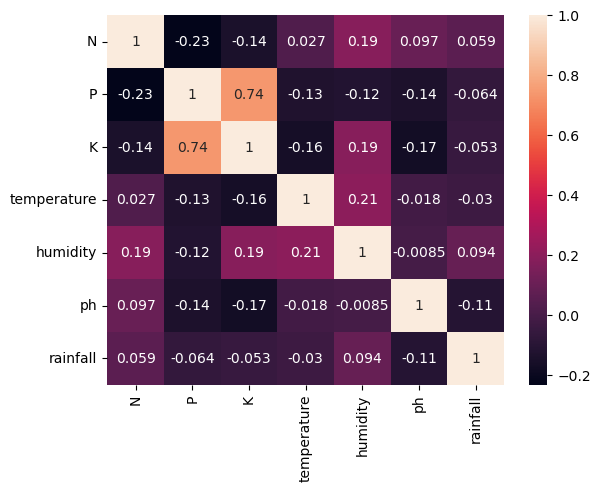

In [222]:
import seaborn as sns
sns.heatmap(df_numeric.corr(),annot=True,cbar=True)

In [224]:
df.label.value_counts()

label
rice           100
maize          100
jute           100
cotton         100
coconut        100
papaya         100
orange         100
apple          100
muskmelon      100
watermelon     100
grapes         100
mango          100
banana         100
pomegranate    100
lentil         100
blackgram      100
mungbean       100
mothbeans      100
pigeonpeas     100
kidneybeans    100
chickpea       100
coffee         100
Name: count, dtype: int64

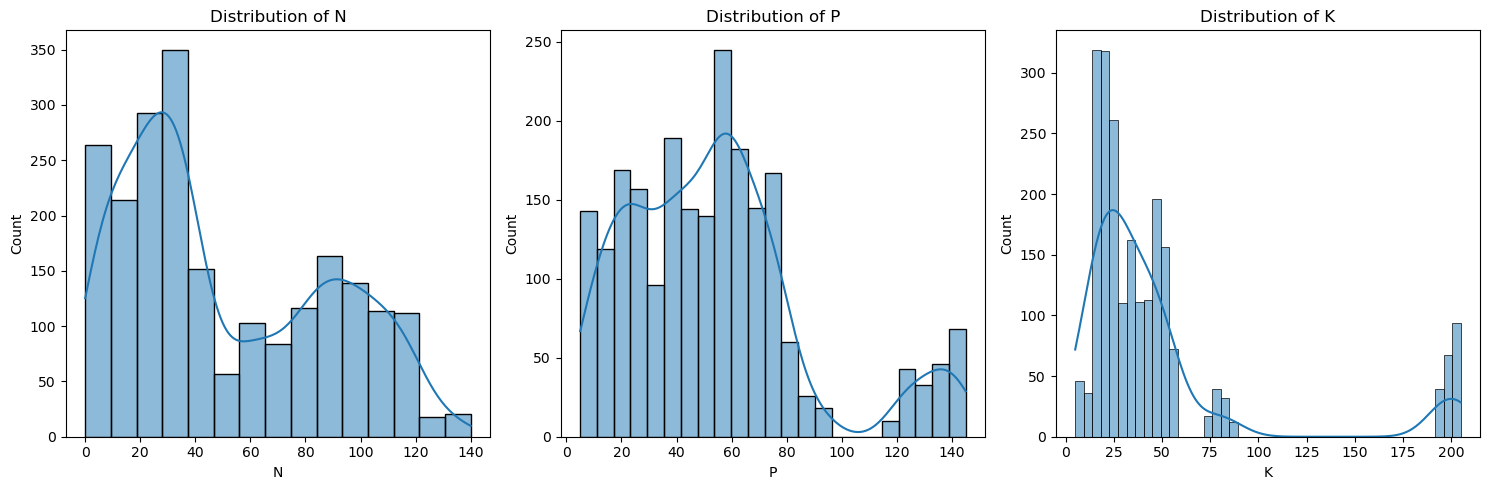

In [226]:
import matplotlib.pyplot as plt
import seaborn as sns

cols = ['N', 'P', 'K']
fig, axes = plt.subplots(1, 3, figsize=(15,5))

for i, col in enumerate(cols):
    sns.histplot(df[col], kde=True, ax=axes[i])
    axes[i].set_title(f'Distribution of {col}')

plt.tight_layout()
plt.show()


In [228]:
# Calculate mean of each variable grouped by label (crop)
crop_means = df.groupby('label').mean()
crop_means


,N,P,K,temperature,humidity,ph,rainfall
label,,,,,,,
apple,20.80,134.22,199.89,22.630942,92.333383,5.929663,112.654779
banana,100.23,82.01,50.05,27.376798,80.358123,5.983893,104.626980
blackgram,40.02,67.47,19.24,29.973340,65.118426,7.133952,67.884151
chickpea,40.09,67.79,79.92,18.872847,16.860439,7.336957,80.058977
coconut,21.98,16.93,30.59,27.409892,94.844272,5.976562,175.686646
coffee,101.20,28.74,29.94,25.540477,58.869846,6.790308,158.066295
cotton,117.77,46.24,19.56,23.988958,79.843474,6.912675,80.398043
grapes,23.18,132.53,200.11,23.849575,81.875228,6.025937,69.611829
jute,78.40,46.86,39.99,24.958376,79.639864,6.732778,174.792798


In [230]:
df.label.unique()

array(['rice', 'maize', 'chickpea', 'kidneybeans', 'pigeonpeas',
       'mothbeans', 'mungbean', 'blackgram', 'lentil', 'pomegranate',
       'banana', 'mango', 'grapes', 'watermelon', 'muskmelon', 'apple',
       'orange', 'papaya', 'coconut', 'cotton', 'jute', 'coffee'],
      dtype=object)

In [232]:
df.head()

,N,P,K,temperature,humidity,ph,rainfall,label
0,90,42,43,20.879744,82.002744,6.502985,202.935536,rice
1,85,58,41,21.770462,80.319644,7.038096,226.655537,rice
2,60,55,44,23.004459,82.320763,7.840207,263.964248,rice
3,74,35,40,26.491096,80.158363,6.980401,242.864034,rice
4,78,42,42,20.130175,81.604873,7.628473,262.717340,rice


In [234]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier, ExtraTreeClassifier
from sklearn.ensemble import RandomForestClassifier, BaggingClassifier, GradientBoostingClassifier, AdaBoostClassifier
from sklearn.metrics import accuracy_score

In [238]:
df_dict ={
    'rice': 1, 'maize': 2, 'chickpea': 3, 'kidneybeans': 4, 'pigeonpeas': 5,
    'mothbeans': 6, 'mungbean': 7, 'blackgram': 8, 'lentil': 9, 'pomegranate': 10,
    'banana': 11, 'mango': 12, 'grapes': 13, 'watermelon': 14, 'muskmelon': 15,
    'apple': 16, 'orange': 17, 'papaya': 18, 'coconut': 19, 'cotton': 20, 'jute': 21, 'coffee': 22
}
df_dict

{'rice': 1,
 'maize': 2,
 'chickpea': 3,
 'kidneybeans': 4,
 'pigeonpeas': 5,
 'mothbeans': 6,
 'mungbean': 7,
 'blackgram': 8,
 'lentil': 9,
 'pomegranate': 10,
 'banana': 11,
 'mango': 12,
 'grapes': 13,
 'watermelon': 14,
 'muskmelon': 15,
 'apple': 16,
 'orange': 17,
 'papaya': 18,
 'coconut': 19,
 'cotton': 20,
 'jute': 21,
 'coffee': 22}

In [240]:
# Assuming df is your DataFrame with a 'label' column containing crop names
df['label'] = df['label'].map(df_dict)
df['label']

0        1
1        1
2        1
3        1
4        1
        ..
2195    22
2196    22
2197    22
2198    22
2199    22
Name: label, Length: 2200, dtype: int64

In [242]:
# Features and target
X = df.drop('label', axis=1)
y = df['label']

In [244]:
# Split into train and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42, stratify=y)

In [251]:
# Fit scalers on training data only
mx = MinMaxScaler()
X_train_mx = mx.fit_transform(X_train)
X_test_mx = mx.transform(X_test)

In [253]:
sc = StandardScaler()
X_train_scaled = sc.fit_transform(X_train_mx)
X_test_scaled = sc.transform(X_test_mx)

In [255]:
# Define classifiers
models = {
    "LogisticRegression": LogisticRegression(max_iter=500),
    "GaussianNB": GaussianNB(),
    "SVC": SVC(probability=True),
    "KNeighborsClassifier": KNeighborsClassifier(),
    "DecisionTreeClassifier": DecisionTreeClassifier(),
    "ExtraTreeClassifier": ExtraTreeClassifier(),
    "RandomForestClassifier": RandomForestClassifier(),
    "BaggingClassifier": BaggingClassifier(),
    "GradientBoostingClassifier": GradientBoostingClassifier(),
    "AdaBoostClassifier": AdaBoostClassifier()
}

In [259]:
# Train and evaluate models
for name, model in models.items():
    model.fit(X_train_scaled, y_train)
    y_pred = model.predict(X_test_scaled)
    print(f"{name} model accuracy: {accuracy_score(y_test, y_pred):.6f}")

LogisticRegression model accuracy: 0.975000
GaussianNB model accuracy: 0.995455
SVC model accuracy: 0.988636
KNeighborsClassifier model accuracy: 0.990909
DecisionTreeClassifier model accuracy: 0.990909
ExtraTreeClassifier model accuracy: 0.925000
RandomForestClassifier model accuracy: 0.997727
BaggingClassifier model accuracy: 0.995455
GradientBoostingClassifier model accuracy: 0.995455
AdaBoostClassifier model accuracy: 0.181818


C:\ProgramData\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


In [261]:
# Choose RandomForest as final model example
randclf = RandomForestClassifier()
randclf.fit(X_train_scaled, y_train)

RandomForestClassifier()

In [263]:
# Inverse map labels to crop names
inv_map = {v: k for k, v in df_dict.items()}

In [265]:
def recommendation(N, P, K, temperature, humidity, ph, rainfall):
    import pandas as pd
    input_df = pd.DataFrame([[N, P, K, temperature, humidity, ph, rainfall]],
                            columns=['N', 'P', 'K', 'temperature', 'humidity', 'ph', 'rainfall'])
    input_mx = mx.transform(input_df)
    input_scaled = sc.transform(input_mx)
    pred_label = randclf.predict(input_scaled)[0]
    return inv_map[pred_label]

In [271]:
N=90
P=42
K=43
temperature=20
humidity=82
ph=6
rainfall=202

predict = recommendation(N, P, K, temperature, humidity, ph, rainfall)
predict

'rice'

In [273]:
import pickle

# Save your model
with open('randclf_model.pkl', 'wb') as f:
    pickle.dump(randclf, f)

# Save your MinMaxScaler
with open('minmax_scaler.pkl', 'wb') as f:
    pickle.dump(mx, f)

# Save your StandardScaler
with open('standard_scaler.pkl', 'wb') as f:
    pickle.dump(sc, f)

# Save your mapping dictionary
with open('label_mapping.pkl', 'wb') as f:
    pickle.dump(df_dict, f)
